In [47]:
from autograd.tensor import Tensor as tn
from autograd.dropout import *
from autograd.parameter import Parameter as pr
from autograd.flatten import Flatten as fl
from autograd.module import Module
from autograd.nn import Sequential
from autograd.linear import Linear
from autograd.act import Relu, Sigmoid 
from autograd.loss import CEL
from autograd.optim import GD
from autograd.mini_batch import mini_batch
from autograd.grad_check import Grad_Check as gc
from functools import reduce

import sys 
import matplotlib.pyplot as plt
import numpy as np

In [48]:
from Dataset1 import catnoncat


In [49]:
train_x = catnoncat.train_x() 
test_x = catnoncat.test_img() 

In [50]:
train_x = fl().forward(train_x)
test_x = fl().forward(test_x)

data shape: (12288, 209)
data shape: (12288, 50)


In [51]:
train_y = tn(catnoncat.train_y())
test_y = tn(catnoncat.test_y())

In [52]:
print(train_x.shape,' ',test_x.shape)

(12288, 209)   (12288, 50)


In [74]:
mod2 = Sequential([
         Linear(50,12288),
            Relu(),
        #Dropout(.9),
         Linear(20,50),
            Relu(),
        #Dropout(.9),
         Linear(10,20),
            Relu(),
        #Dropout(.9),
         Linear(1,10),
            Sigmoid()])

Cost after epoch 0: 0.732458
Cost after epoch 32: 0.665144
Cost after epoch 64: 0.649432
Cost after epoch 96: 0.637208
Cost after epoch 128: 0.628610
Cost after epoch 160: 0.621255
Cost after epoch 192: 0.614486
Cost after epoch 224: 0.607888
Cost after epoch 256: 0.601350
Cost after epoch 288: 0.593052
Cost after epoch 320: 0.583957
Cost after epoch 352: 0.573413
Cost after epoch 384: 0.564114
Cost after epoch 416: 0.555305
Cost after epoch 448: 0.547148
Cost after epoch 480: 0.538592
Cost after epoch 512: 0.530243
Cost after epoch 544: 0.522452
Cost after epoch 576: 0.514759
Cost after epoch 608: 0.506174
Cost after epoch 640: 0.498001
Cost after epoch 672: 0.489160
Cost after epoch 704: 0.480951
Cost after epoch 736: 0.473179
Cost after epoch 768: 0.465397
Cost after epoch 800: 0.458256
Cost after epoch 832: 0.451050
Cost after epoch 864: 0.444269
Cost after epoch 896: 0.437740
Cost after epoch 928: 0.431336
Cost after epoch 960: 0.425116
Cost after epoch 992: 0.419050
Cost after ep

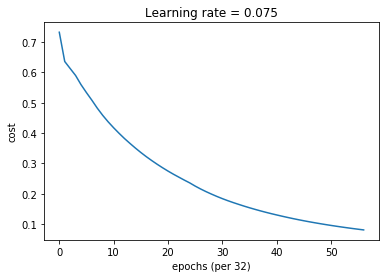

In [75]:
optimizer = GD(lr=.00075)


costs = []
it = 3625
for i in range(it):

    minibatches = mini_batch(train_x, train_y, 32, 1)

    for minibatch in minibatches.apply():

        (minibatch_X, minibatch_Y) = minibatch

        out = mod2.forward(minibatch_X)
        cout = CEL(out,minibatch_Y)
        loss = cout.sum()
        epoch_loss = loss.data

        loss.backward()
        
        #optimizer.save_params(mod2)
        optimizer.step(mod2)


    # Print the cost every 1000 epoch
    if  i % 32 == 0:
        print("Cost after epoch %i: %f" % (i, epoch_loss))
    if i % 100 == 0:
        costs.append(epoch_loss)


# plot the cost
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('epochs (per 32)')
plt.title("Learning rate = " + str(.075))
plt.show()

mod2.predict(test_x,test_y)

In [77]:
mod2.predict(test_x,test_y)

Accuracy: 0.74


In [71]:

lrs=[]



In [72]:
lrs.append((it,optimizer.lr))

In [73]:
lrs

[(3625, 0.00075)]